In [1]:
import itertools
import copy
import openpyxl
import numpy as np
from SV_for_auction import *
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Social Networks
* participantsInfo: a dict saving all participants' info 
    * {name(string): (valuation, neighbor)}
    * the valuation of seller S is reserved price 0
* participantsName: a list saving all participants' name (used for permutation)
* N: the number of participants

In [2]:
# Social Network 1
participantsInfo = {\
    'S': ([0], ['A', 'B', 'C']), \
    'A': ([1], ['S', 'D']), \
    'B': ([4], ['S', 'E', 'F']), \
    'C': ([3], ['S', 'G']), \
    'D': ([6], ['A', 'H']), \
    'E': ([5], ['B', 'I']), \
    'F': ([7], ['B']), \
    'G': ([9], ['C']), \
    'H': ([10], ['D']), \
    'I': ([8], ['E', 'J']), \
    'J': ([12], ['I', 'K']), \
    'K': ([13], ['J'])}
participantsName = list(participantsInfo.keys())
N = len(participantsName) - 1

In [3]:
# Social Network 2
participantsInfo = {\
    'S':([0],['A','B']),\
    'A':([1],['S','C']),\
    'B':([2],['S']),\
    'C':([3],['A'])}
participantsName = list(participantsInfo.keys())

In [4]:
# Social Network 3
participantsInfo = {\
    'S':([0],['A','B']),\
    'A':([1],['S''C','D']),\
    'B':([2],['S']),\
    'C':([3],['A']),\
    'D':([4],['A'])}
participantsName = list(participantsInfo.keys())

In [5]:
# Social Network 4
participantsInfo = {\
    'S':([0],['A','B']),\
    'A':([1],['S','C', 'D']),\
    'B':([2],['S','E']),\
    'C':([3],['A']),\
    'D':([5],['A']),\
    'E':([4],['B'])}
participantsName = list(participantsInfo.keys())

Permutations

In [6]:
# Involving S
randomPermutation = np.random.permutation(participantsName)
allPermutations = itertools.permutations(participantsName,len(participantsName))
# NOT involving S
randomPermutation_withoutS = np.random.permutation(participantsName[1:])
allPermutations_withoutS = itertools.permutations(participantsName[1:])

Functions
* can_reach
    * input:
        * BI: participants who are involved (set)
        * PI: participants' information (dict)
    * output:
        * CR: participants can be reached from S-seller (set)

In [7]:
# TEST
permutation = np.random.permutation(participantsName)
print("Permutation:", permutation)
for i in range(N+1):
    beInvolved = set(permutation[0:i+1])
    canReach = can_reach(set(permutation[0:i+1]), participantsInfo)
    print("Be Involved:", beInvolved, "; Can Reach:", canReach)

Permutation: ['D' 'S' 'E' 'A' 'C' 'B']
Be Involved: {'D'} ; Can Reach: set()
Be Involved: {'S', 'D'} ; Can Reach: {'S'}
Be Involved: {'S', 'E', 'D'} ; Can Reach: {'S'}
Be Involved: {'S', 'E', 'A', 'D'} ; Can Reach: {'S', 'D', 'A'}
Be Involved: {'C', 'D', 'S', 'E', 'A'} ; Can Reach: {'S', 'C', 'D', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}
Be Involved: {'C', 'D', 'B', 'S', 'E', 'A'} ; Can Reach: {'C', 'D', 'B', 'S', 'E', 'A'}


In [8]:

allMarginalSW1 = []
allMarginalSW2 = []
for p in itertools.permutations(participantsName,len(participantsName)):
    SW1 = SW_of_permutation_first_price(participantsInfo,p)
    SW2 = SW_of_permutation_first_price_modified(participantsInfo,p)
    marginalSW1_permutationOrder, marginalSW1_default = calculate_marginal_SW(SW1, p, participantsName)
    marginalSW2_permutationOrder, marginalSW2_default = calculate_marginal_SW(SW2, p, participantsName)
    allMarginalSW1.append(marginalSW1_default)
    allMarginalSW2.append(marginalSW2_default)
    print(p,SW1, SW2, marginalSW1_permutationOrder, marginalSW1_default, marginalSW2_permutationOrder, marginalSW2_default)
# mean
allMarginalSW1 = np.array(allMarginalSW1)
ShapV1 = np.mean(allMarginalSW1, axis=0)
allMarginalSW2 = np.array(allMarginalSW2)
ShapV2 = np.mean(allMarginalSW2, axis=0)
print(participantsName)
print(ShapV1)
print(ShapV2)

('S', 'A', 'B', 'C', 'D', 'E') [0, 1, 2, 3, 5, 5] [0, 0, 1, 2, 3, 5] [0, 1, 1, 1, 2, 0] [0, 1, 1, 1, 2, 0] [0, 0, 1, 1, 1, 2] [0, 0, 1, 1, 1, 2]
('S', 'A', 'B', 'C', 'E', 'D') [0, 1, 2, 3, 4, 5] [0, 0, 1, 2, 3, 4] [0, 1, 1, 1, 1, 1] [0, 1, 1, 1, 1, 1] [0, 0, 1, 1, 1, 1] [0, 0, 1, 1, 1, 1]
('S', 'A', 'B', 'D', 'C', 'E') [0, 1, 2, 5, 5, 5] [0, 0, 1, 2, 5, 5] [0, 1, 1, 3, 0, 0] [0, 1, 1, 0, 3, 0] [0, 0, 1, 1, 3, 0] [0, 0, 1, 3, 1, 0]
('S', 'A', 'B', 'D', 'E', 'C') [0, 1, 2, 5, 5, 5] [0, 0, 1, 2, 5, 5] [0, 1, 1, 3, 0, 0] [0, 1, 1, 0, 3, 0] [0, 0, 1, 1, 3, 0] [0, 0, 1, 0, 1, 3]
('S', 'A', 'B', 'E', 'C', 'D') [0, 1, 2, 4, 4, 5] [0, 0, 1, 2, 4, 4] [0, 1, 1, 2, 0, 1] [0, 1, 1, 0, 1, 2] [0, 0, 1, 1, 2, 0] [0, 0, 1, 2, 0, 1]
('S', 'A', 'B', 'E', 'D', 'C') [0, 1, 2, 4, 5, 5] [0, 0, 1, 2, 4, 5] [0, 1, 1, 2, 1, 0] [0, 1, 1, 0, 1, 2] [0, 0, 1, 1, 2, 1] [0, 0, 1, 1, 2, 1]
('S', 'A', 'C', 'B', 'D', 'E') [0, 1, 3, 3, 5, 5] [0, 0, 1, 3, 3, 5] [0, 1, 2, 0, 2, 0] [0, 1, 0, 2, 2, 0] [0, 0, 1, 2, 0, 2] [0, 

In [9]:
print("SW1")
allMarginalSW1 = []
for p in itertools.permutations(participantsName,len(participantsName)):
    SW1 = SW_of_permutation_first_price(participantsInfo,p)
    marginalSW1_permutationOrder, marginalSW1_default = calculate_marginal_SW(SW1, p, participantsName)
    allMarginalSW1.append(marginalSW1_default)
    print(p,SW1,marginalSW1_permutationOrder, marginalSW1_default)
# mean
allMarginalSW1 = np.array(allMarginalSW1)
ShapV1 = np.mean(allMarginalSW1, axis=0)
print(participantsName)
print(ShapV1)

SW1
('S', 'A', 'B', 'C', 'D', 'E') [0, 1, 2, 3, 5, 5] [0, 1, 1, 1, 2, 0] [0, 1, 1, 1, 2, 0]
('S', 'A', 'B', 'C', 'E', 'D') [0, 1, 2, 3, 4, 5] [0, 1, 1, 1, 1, 1] [0, 1, 1, 1, 1, 1]
('S', 'A', 'B', 'D', 'C', 'E') [0, 1, 2, 5, 5, 5] [0, 1, 1, 3, 0, 0] [0, 1, 1, 0, 3, 0]
('S', 'A', 'B', 'D', 'E', 'C') [0, 1, 2, 5, 5, 5] [0, 1, 1, 3, 0, 0] [0, 1, 1, 0, 3, 0]
('S', 'A', 'B', 'E', 'C', 'D') [0, 1, 2, 4, 4, 5] [0, 1, 1, 2, 0, 1] [0, 1, 1, 0, 1, 2]
('S', 'A', 'B', 'E', 'D', 'C') [0, 1, 2, 4, 5, 5] [0, 1, 1, 2, 1, 0] [0, 1, 1, 0, 1, 2]
('S', 'A', 'C', 'B', 'D', 'E') [0, 1, 3, 3, 5, 5] [0, 1, 2, 0, 2, 0] [0, 1, 0, 2, 2, 0]
('S', 'A', 'C', 'B', 'E', 'D') [0, 1, 3, 3, 4, 5] [0, 1, 2, 0, 1, 1] [0, 1, 0, 2, 1, 1]
('S', 'A', 'C', 'D', 'B', 'E') [0, 1, 3, 5, 5, 5] [0, 1, 2, 2, 0, 0] [0, 1, 0, 2, 2, 0]
('S', 'A', 'C', 'D', 'E', 'B') [0, 1, 3, 5, 5, 5] [0, 1, 2, 2, 0, 0] [0, 1, 0, 2, 2, 0]
('S', 'A', 'C', 'E', 'B', 'D') [0, 1, 3, 3, 4, 5] [0, 1, 2, 0, 1, 1] [0, 1, 1, 2, 1, 0]
('S', 'A', 'C', 'E', 'D', 'B

In [10]:
print("SW2")
allMarginalSW2 = []
for p in itertools.permutations(participantsName,len(participantsName)):
    SW2 = SW_of_permutation_first_price_modified(participantsInfo,p)
    marginalSW2_permutationOrder, marginalSW2_default = calculate_marginal_SW(SW2, p, participantsName)
    allMarginalSW2.append(marginalSW2_default)
    print(p,SW2,marginalSW2_permutationOrder, marginalSW2_default)
# mean
allMarginalSW2 = np.array(allMarginalSW2)
ShapV2 = np.mean(allMarginalSW2, axis=0)
print(participantsName)
print(ShapV2)

SW2
('S', 'A', 'B', 'C', 'D', 'E') [0, 0, 1, 2, 3, 5] [0, 0, 1, 1, 1, 2] [0, 0, 1, 1, 1, 2]
('S', 'A', 'B', 'C', 'E', 'D') [0, 0, 1, 2, 3, 4] [0, 0, 1, 1, 1, 1] [0, 0, 1, 1, 1, 1]
('S', 'A', 'B', 'D', 'C', 'E') [0, 0, 1, 2, 5, 5] [0, 0, 1, 1, 3, 0] [0, 0, 1, 3, 1, 0]
('S', 'A', 'B', 'D', 'E', 'C') [0, 0, 1, 2, 5, 5] [0, 0, 1, 1, 3, 0] [0, 0, 1, 0, 1, 3]
('S', 'A', 'B', 'E', 'C', 'D') [0, 0, 1, 2, 4, 4] [0, 0, 1, 1, 2, 0] [0, 0, 1, 2, 0, 1]
('S', 'A', 'B', 'E', 'D', 'C') [0, 0, 1, 2, 4, 5] [0, 0, 1, 1, 2, 1] [0, 0, 1, 1, 2, 1]
('S', 'A', 'C', 'B', 'D', 'E') [0, 0, 1, 3, 3, 5] [0, 0, 1, 2, 0, 2] [0, 0, 2, 1, 0, 2]
('S', 'A', 'C', 'B', 'E', 'D') [0, 0, 1, 3, 3, 4] [0, 0, 1, 2, 0, 1] [0, 0, 2, 1, 1, 0]
('S', 'A', 'C', 'D', 'B', 'E') [0, 0, 1, 3, 5, 5] [0, 0, 1, 2, 2, 0] [0, 0, 2, 1, 2, 0]
('S', 'A', 'C', 'D', 'E', 'B') [0, 0, 1, 3, 5, 5] [0, 0, 1, 2, 2, 0] [0, 0, 0, 1, 2, 2]
('S', 'A', 'C', 'E', 'B', 'D') [0, 0, 1, 3, 4, 4] [0, 0, 1, 2, 1, 0] [0, 0, 1, 1, 0, 2]
('S', 'A', 'C', 'E', 'D', 'B

The Patched Random Method

In [11]:

# participantsInfo = {\
#     'S':([0],['A','B']),\
#     'A':([1],['S','C', 'D']),\
#     'B':([2],['S','E']),\
#     'C':([3],['A']),\
#     'D':([5],['A']),\
#     'E':([4],['B'])}
# participantsName = list(participantsInfo.keys())

# reported_participantsInfo={\
#     'S':([0],['A','B']),\
#     'A':([1],['S','C', 'D']),\
#     'B':([2],['S','E']),\
#     'C':([3],['A']),\
#     'D':([5],['A']),\
#     'E':([4],['B'])}


# # randomPermutation = np.random.permutation(participantsName)
# # print('Random Permutation', randomPermutation)
# # print('~~Patched Random Mechanism~~')
# # patched_random_mechanism(participantsInfo, randomPermutation)

# wb=openpyxl.Workbook()
# wb.create_sheet(index=0,title="1")
# sheet=wb.worksheets[0]

# count=1
# n=1
# sheet.cell(count,n).value="winner"
# n=n+1

# sheet.cell(count,n).value="Marginal"
# n=n+1
# for i in participantsName:
#     sheet.cell(count,n).value=i
#     n=n+1

# sheet.cell(count,n).value="Payment"
# n=n+1
# for i in participantsName:
#     sheet.cell(count,n).value=i
#     n=n+1

# sheet.cell(count,n).value="utility"
# n=n+1
# for i in participantsName:
#     sheet.cell(count,n).value=i
#     n=n+1

# all_permutations=itertools.permutations(participantsName,len(participantsName))
# count=count+1

# avg=([0 for j in range(len(participantsName))],[0 for j in range(len(participantsName))])
# for i in all_permutations:
    
#     result=patched_random_mechanism(reported_participantsInfo,i)
#     for j in range(len(participantsName)):
#         avg[0][j]=avg[0][j]+result[1][j]
#         avg[1][j]=avg[1][j]+result[2][j]
#     # utility=[-i for i in result[2]]
#     # winner_index=participantsName.index(result[0])
#     # utility[winner_index]=utility[winner_index]+participantsInfo[result[0]][0][0]

#     n=1
#     for j in result:
#         for k in range(1,len(j)+1):
#             sheet.cell(count,n).value=j[k-1]
#             n=n+1
#         n=n+1

#     # for k in range(1,len(utility)+1):
#     #     sheet.cell(count,n).value=utility[k-1]
#     #     n=n+1
#     # n=n+1
#     count=count+1

# # for i in range(n):
# #     try:
# #         sheet.cell(count,i).value=np.mean([float(sheet.cell(j,i).value) for j in range(1,count) ])
# #     except ValueError:
# #         pass
# for j in range(len(participantsName)):
#         avg[0][j]=avg[0][j]/(count-2)
#         avg[1][j]=avg[1][j]/(count-2)
# print(count,avg)
# wb.save("result.xlsx")
    
    

In [12]:
def dictory_average(dictory):
    
    avg_dict=[0 for i in list(dictory.keys())[0]]
    for i in dictory:
        for j in range(len(avg_dict)):
            avg_dict[j]=avg_dict[j]+dictory[i][j]
    for i in range(len(avg_dict)):
        avg_dict[i]=avg_dict[i]/len(dictory.keys())
    return avg_dict        



def misreport_price(participantsType,agent,price_range, Mechanism=patched_random_mechanism, show_plot=False):
    #the agent misreports the price in price_range, show the utility of the agent 
    #price range is a list of price the agent misreport
    data={}
    participantsName=list(participantsType.keys())
    agent_index=participantsName.index(agent)
    for price in price_range:
        # participantsInfo=participantsType.copy()
        participantsInfo=copy.deepcopy(participantsType)
        participantsInfo[agent][0][0]=price
        result,utility=all_permutation_auction(participantsType,participantsInfo,Mechanism)
        avg_utility=dictory_average(utility)
        data[price]=avg_utility

    if show_plot==True:
        x_data=[i for i in data]
        y_data=[data[i][agent_index] for i in data]
        plt.plot(x_data,y_data,marker='o')
        plt.show()
    return data

def misreport_neighbors(participantsType,agent, Mechanism=patched_random_mechanism):
    data={}
    neighbors=copy.deepcopy(participantsType[agent][1])
    possible_reports=[]
    for i in range(len(neighbors)+1):
        for j in list(itertools.combinations(neighbors,i)):
            possible_reports.append(j)
    for i in possible_reports:
        participantsInfo=copy.deepcopy(participantsType)
        participantsInfo[agent]=(participantsInfo[agent][0],copy.deepcopy(i))
        result,utility=all_permutation_auction(participantsType,participantsInfo,Mechanism)
        avg_utility=dictory_average(utility)
        data[i]=avg_utility
    return data


[2.05, 0.35833333333333334, 0.6777777777777778, 0.0875, 0.7361111111111112, 0.20972222222222223]


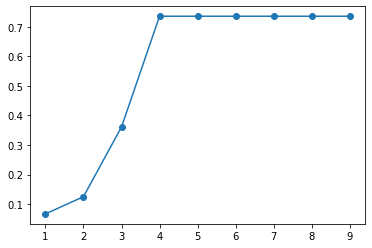

{1: [1.5833333333333333,
  0.425,
  0.36666666666666664,
  0.15833333333333333,
  0.06666666666666667,
  0.6416666666666667],
 2: [1.6166666666666667,
  0.4583333333333333,
  0.35,
  0.14305555555555555,
  0.125,
  0.6333333333333333],
 3: [1.7,
  0.5111111111111111,
  0.35,
  0.05277777777777778,
  0.3611111111111111,
  0.5083333333333333],
 4: [2.15,
  0.425,
  0.6722222222222223,
  0.06944444444444445,
  0.7361111111111112,
  0.11805555555555555],
 5: [2.05,
  0.35833333333333334,
  0.6777777777777778,
  0.0875,
  0.7361111111111112,
  0.20972222222222223],
 6: [2.05,
  0.35833333333333334,
  0.6777777777777778,
  0.0875,
  0.7361111111111112,
  0.20972222222222223],
 7: [2.05,
  0.35833333333333334,
  0.6777777777777778,
  0.0875,
  0.7361111111111112,
  0.20972222222222223],
 8: [2.05,
  0.35833333333333334,
  0.6777777777777778,
  0.0875,
  0.7361111111111112,
  0.20972222222222223],
 9: [2.05,
  0.35833333333333334,
  0.6777777777777778,
  0.0875,
  0.7361111111111112,
  0.20972

In [13]:
# Social Network 4
participantsInfo = {\
    'S':([0],['A','B']),\
    'A':([1],['S','C', 'D']),\
    'B':([2],['S','E']),\
    'C':([3],['A']),\
    'D':([5],['A']),\
    'E':([4],['B'])}
participantsName = list(participantsInfo.keys())

reported_participantsInfo={\
    'S':([0],['A','B']),\
    'A':([1],['S','C', 'D']),\
    'B':([2],['S','E']),\
    'C':([3],['A']),\
    'D':([5],['A']),\
    'E':([4],['B'])}

result,utility=all_permutation_auction(participantsInfo,reported_participantsInfo)

# avg_utility=[0 for i in participantsName]
# for i in utility:
#     for j in range(len(avg_utility)):
#         avg_utility[j]=avg_utility[j]+utility[i][j]
# for i in range(len(avg_utility)):
#     avg_utility[i]=avg_utility[i]/len(utility.keys())
avg_utility=dictory_average(utility)
print(avg_utility)

misreport_price(participantsInfo,'D',[1,2,3,4,5,6,7,8,9],patched_random_mechanism,True)

# misreport_neighbors(participantsInfo,"A")